# Del 9: Priprava in čiščenje podatkov - napredno

Pripravimo datasete:

In [1]:
!tar -xJf data/data_del_09.tar.xz -C ./data/

## Working With Strings In Pandas

### Data

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# read the data sets into pandas
world_dev = pd.read_csv("data/World_dev.csv")
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')

In [4]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
world_dev.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


In [6]:
merged = pd.merge(left = happiness2015,
                 right = world_dev,
                 how = 'left',
                 left_on = 'Country',
                 right_on = 'ShortName')

In [7]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 43 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     158 non-null    object 
 1   Region_x                                    158 non-null    object 
 2   Happiness Rank                              158 non-null    int64  
 3   Happiness Score                             158 non-null    float64
 4   Standard Error                              158 non-null    float64
 5   Economy (GDP per Capita)                    158 non-null    float64
 6   Family                                      158 non-null    float64
 7   Health (Life Expectancy)                    158 non-null    float64
 8   Freedom                                     158 non-null    float64
 9   Trust (Government Corruption)               158 non-null    float64
 10  Generosity    

In [8]:
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}

In [9]:
merged.rename(col_renaming, axis = 1, inplace = True)

In [10]:
merged.head(2)

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0


### Using Apply to Transform Strings

In [12]:
merged['CurrencyUnit'].head() #želimo si dobiti ime valute brez imena države

0        Swiss franc
1      Iceland krona
2       Danish krone
3    Norwegian krone
4    Canadian dollar
Name: CurrencyUnit, dtype: object

In [13]:
words = 'Danish krone'
words.split()[-1]

'krone'

In [14]:
def extract_last_word(element):
    return str(element).split()[-1]

In [15]:
merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_word)

In [16]:
merged['Currency Apply'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Apply, dtype: object

### Vectorized String Methods

<img src="./images/Split.png">

<table class="tg">
<tbody><tr>
<th>Method</th>
<th>Description</th>
</tr>
<tr>
<td>Series.str.split()</td>
<td>Splits each element in the Series.</td>
</tr>
<tr>
<td>Series.str.strip()</td>
<td>Strips whitespace from each string in the Series.</td>
</tr>
<tr>
<td>Series.str.lower()</td>
<td>Converts strings in the Series to lowercase.</td>
</tr>
<tr>
<td>Series.str.upper()</td>
<td>Converts strings in the Series to uppercase.</td>
</tr>
<tr>
<td>Series.str.get()</td>
<td>Retrieves the ith element of each element in the Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.replace()</span></td>
<td><span style="font-weight:300;font-style:normal">Replaces a regex or string in the Series with another string.</span></td>
</tr>
<tr>
<td>Series.str.cat()</td>
<td>Concatenates strings in a Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.extract()</span></td>
<td><span style="font-weight:300;font-style:normal">Extracts substrings from the Series matching a regex pattern.</span></td>
</tr>
</tbody></table>

<img src="./images/Syntax.png">

In [22]:
merged['Currency Vectorised'] = merged['CurrencyUnit'].str.split().str[-1] #karkoli počnemo na stringih, je potrebno uporabiti .str metodo
merged['Currency Vectorised'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorised, dtype: object

#### Exploring Missing Values with Vectorized String Methods

In [23]:
merged['CurrencyUnit'].isnull().sum() #sum prešteje True vrednosti

13

In [28]:
def compute_lengths(element):
    if pd.isnull(element):
        pass
    else:
        return len(str(element))

In [29]:
lengths_apply = merged['CurrencyUnit'].apply(compute_lengths)

In [30]:
lengths_apply.value_counts(dropna = False)

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
10.0     1
39.0     1
26.0     1
23.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

In [31]:
merged['CurrencyUnit'].str.len().value_counts(dropna = False) #vektorska metoda

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
10.0     1
39.0     1
26.0     1
23.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

## Regular Expressions in Pandas

In [ ]:
# https://regexr.com/

### The Regular Expression Module

In [32]:
import re #importamo regex

In [33]:
pattern = 'and'
re.search(pattern, 'This is a hand.')

<re.Match object; span=(11, 14), match='and'>

### Finding Specific Words in Strings

<img src="./images/set_syntax_breakdown.svg">

<img src="./images/basic_match_2.svg">

In [34]:
merged['SpecialNotes'].head(10)

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4    Fiscal year end: March 31; reporting period fo...
5    A simple multiplier is used to convert the nat...
6    A simple multiplier is used to convert the nat...
7    Fiscal year end: June 30; reporting period for...
8    Fiscal year end: March 31; reporting period fo...
9    Fiscal year end: June 30; reporting period for...
Name: SpecialNotes, dtype: object

In [36]:
#iščemo vse vrstice ki vsebujejo:
pattern1 = 'National accounts'
pattern2 = 'national accounts'

In [37]:
national_accounts = merged['SpecialNotes'].str.contains(pattern1)
national_accounts.sum()

10

In [38]:
national_accounts = merged['SpecialNotes'].str.contains(pattern2)
national_accounts.sum()

46

In [40]:
pattern = '[Nn]ational accounts' #Oglati oklepaj pomeni 1 znak od tistih, ki so navedeni v njem
national_accounts = merged['SpecialNotes'].str.contains(pattern)
national_accounts.sum()

54

In [41]:
national_accounts.head(10)

0      NaN
1      NaN
2      NaN
3      NaN
4     True
5    False
6    False
7     True
8     True
9     True
Name: SpecialNotes, dtype: object

In [43]:
pattern = '[Nn]ational accounts' #Oglati oklepaj pomeni 1 znak od tistih, ki so navedeni v njem
merged['SpecialNotes'].str.contains(pattern).sum()


54

In [46]:
pattern = '[Nn]ational accounts'
national_accounts = merged['SpecialNotes'].str.contains(pattern, na = False)

In [47]:
national_accounts.value_counts(dropna = False)

False    104
True      54
Name: SpecialNotes, dtype: int64

In [48]:
merged_national = merged[national_accounts]
merged_national.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorised
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,...,2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0,krona,krona
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,...,2013,NaN,NaN,Yes,2012,2010.0,2013.0,2002.0,dollar,dollar
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,...,2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0,dollar,dollar
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,...,2010,NaN,"Labor force survey (LFS), 2010",Yes,2012,2008.0,2013.0,2005.0,dollar,dollar


### Using Regular Expressions to Select Data

In [ ]:
try:
    merged[national_accounts]
except ValueError as e:
    print(e)

### Import new dataset

In [50]:
hn = pd.read_csv('data/hacker_news.csv')
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
2,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
3,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12
4,10482257,Title II kills investment? Comcast and other I...,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,10/31/2015 9:48


In [51]:
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20099 entries, 0 to 20098
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            20099 non-null  int64 
 1   title         20099 non-null  object
 2   url           17659 non-null  object
 3   num_points    20099 non-null  int64 
 4   num_comments  20099 non-null  int64 
 5   author        20099 non-null  object
 6   created_at    20099 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [54]:
titles = hn['title']
pattern = '[Pp]ython'
titles_count = titles.str.contains(pattern, na = False)
titles_count.sum()

160

In [55]:
titles = hn['title']
pattern = '[Rr]uby'
titles_count = titles.str.contains(pattern, na = False)
titles_count.sum()

48

In [56]:
titles = hn['title']
pattern = '[Jj]ulia'
titles_count = titles.str.contains(pattern, na = False)
titles_count.sum()

15

### Quantifiers


<p></p><center><img alt="quantifier example" src="images/quantifier_example.svg"></center><p></p>

<p></p><center><img alt="quantifiers" src="images/quantifiers_numeric.svg"></center><p></p>

<p></p><center><img alt="quantifiers" src="images/quantifiers_other.svg"></center><p></p>


In [ ]:
#pattern za iskanje : "email" ali "e-mail"

In [60]:
pattern = 'e-?mail'
titles.str.contains(pattern).sum()

86

In [ ]:
#iščemo take s številko 199_  _ = med 2 in 8

In [62]:
pattern = '19{2}[2-8]'
titles.str.contains(pattern).sum()

47

### Character Classes

In [ ]:
#iščemo zapis [pdf] v oglatih oklepajih

In [ ]:
pattern = '\[pdf\]' # backslash je escape character in to pomeni, da se naslednji znak vzame dobesedno


<p></p><center><img alt="character classes one" src="images/character_classes_v2_1.svg"></center><p></p>

<p></p><center><img alt="character classes two" src="images/character_classes_v2_2.svg"></center><p></p>


In [ ]:
#iščemo vse besede, ki se nahajajo v oglatih oklepajih

In [63]:
pattern = '\[\w+\]'
titles.str.contains(pattern).sum()

444

In [64]:
titles[titles.str.contains(pattern)].head()

66     Analysis of 114 propaganda sources from ISIS, ...
100    Munich Gunman Got Weapon from the Darknet [Ger...
159         File indexing and searching for Plan 9 [pdf]
162    Attack on Kunduz Trauma Centre, Afghanistan  I...
195               [Beta] Speedtest.net  HTML5 Speed Test
Name: title, dtype: object

### Raw strings

In [65]:
print('hello\nhello')

hello
hello


In [66]:
print('hello\bhello')

hellohello


In [67]:
print(r'hello\bhello') #r predstavlja raw string, ki ga python potem obravnava dobesedno

hello\bhello


In [ ]:
pattern = 'r\[pdf\]' #primer

### Extracting Substrings from a Series

In [69]:
tag_5 = titles.head()

In [70]:
tag_5

0                            Interactive Dynamic Video
1    Florida DJs May Face Felony for April Fools' W...
2         Technology ventures: From Idea to Enterprise
3    Note by Note: The Making of Steinway L1037 (2007)
4    Title II kills investment? Comcast and other I...
Name: title, dtype: object

In [73]:
pattern = r'(\[\w+\]')
tag_titles = titles[titles.str.contains(pattern)]
tag_5.str.extract(pattern)

SyntaxError: invalid syntax (<ipython-input-73-7b9df8505e85>, line 1)

In [74]:
titles = hn['title']
pattern = r'\[\w+\]'
tag_titles = titles[titles.str.contains(pattern)]
tag_5 = tag_titles.head()

pattern_ex = r'(\[\w+\])'
tag_5.str.extract(pattern_ex)

,0
66,[pdf]
100,[German]
159,[pdf]
162,[pdf]
195,[Beta]


In [75]:
pattern_ex = r'\[(\w+)\]'
tag_5.str.extract(pattern_ex)

,0
66,pdf
100,German
159,pdf
162,pdf
195,Beta


In [78]:
pattern_ex = r'\[(\w+)\]'
tag_5.str.extract(pattern_ex, expand = False) #vrne series

66        pdf
100    German
159       pdf
162       pdf
195      Beta
Name: title, dtype: object

In [79]:
titles.str.extract(pattern_ex, expand = False).value_counts().head(10)

pdf       276
video     111
audio       3
2015        3
beta        2
2014        2
slides      2
SPA         1
React       1
NSFW        1
Name: title, dtype: int64

In [ ]:
#REPLACE

In [80]:
titles

0                                Interactive Dynamic Video
1        Florida DJs May Face Felony for April Fools' W...
2             Technology ventures: From Idea to Enterprise
3        Note by Note: The Making of Steinway L1037 (2007)
4        Title II kills investment? Comcast and other I...
                               ...                        
20094    How Purism Avoids Intels Active Management Tec...
20095            YC Application Translated and Broken Down
20096    Microkernels are slow and Elvis didn't do no d...
20097                        How Product Hunt really works
20098    RoboBrowser: Your friendly neighborhood web sc...
Name: title, Length: 20099, dtype: object

In [83]:
titles_test = titles.copy()
titles_test.str.replace(r'\(2\d{3}\)', '3000') #replace vsega 2xxx s 3000

0                                Interactive Dynamic Video
1        Florida DJs May Face Felony for April Fools' W...
2             Technology ventures: From Idea to Enterprise
3          Note by Note: The Making of Steinway L1037 3000
4        Title II kills investment? Comcast and other I...
                               ...                        
20094    How Purism Avoids Intels Active Management Tec...
20095            YC Application Translated and Broken Down
20096    Microkernels are slow and Elvis didn't do no d...
20097                        How Product Hunt really works
20098    RoboBrowser: Your friendly neighborhood web sc...
Name: title, Length: 20099, dtype: object

### Using Flags to Modify Regex Patterns

In [84]:
email_tests = pd.Series(['email', 'Email', 'eMail', 'EMAIL'])

In [ ]:
#Kako naredi case insenstive

In [86]:
import re
email_tests.str.contains(r'email', flags = re.I) #I = IGNORECASE

0    True
1    True
2    True
3    True
dtype: bool

### Primer: Create a frequency table of the different capitalizations of SQL

In [88]:
pattern = r'(SQL)'
titles.str.extract(pattern, flags =re.I, expand = False).value_counts() #bolj varno kot presledek je narediti \s

SQL    101
Sql      4
sql      3
Name: title, dtype: int64

In [89]:
pattern = r'(\w+SQL)'
hn_sql = hn[hn['title'].str.contains(pattern, flags = re.I)].copy() 

/home/kovax/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [91]:
hn_sql.head()

,id,title,url,num_points,num_comments,author,created_at
142,10957172,PostgreSQL: Linux VS Windows part 2,http://www.sqig.net/2016/01/postgresql-linux-v...,16,3,based2,1/23/2016 4:21
221,11544342,MemSQL (YC W11) Raises $36M Series C,http://blog.memsql.com/memsql-raises-series-c/,74,14,ericfrenkiel,4/21/2016 18:32
882,10413272,Pgmemcahe :A PostgreSQL memcache functions,https://github.com/ohmu/pgmemcache/,2,1,websec,10/19/2015 14:55
1160,10546681,How to choose an in-memory NoSQL solution: Per...,http://articles.rvncerr.org/how-to-chose-an-in...,9,4,rvncerr,11/11/2015 14:04
1197,11583183,Postgraphql: A GraphQL schema created by refle...,https://github.com/calebmer/postgraphql,217,24,craigkerstiens,4/27/2016 18:29


In [92]:
hn_sql['flavor'] = hn_sql['title'].str.extract(pattern, flags = re.I, expand=False)


142      PostgreSQL
221          MemSQL
882      PostgreSQL
1160          NoSQL
1197     PostgreSQL
1370          NoSQL
2430          MySQL
2432          NoSQL
4546     PostgreSQL
4568          NoSQL
4616     PostgreSQL
4944          NoSQL
5398     PostgreSQL
5523          MySQL
5654       SparkSQL
5738          MySQL
5844          nosql
6523     PostgreSQL
6532          MySQL
7050          MySQL
7245     PostgreSQL
7571     PostgreSQL
8371     PostgreSQL
8823     PostgreSQL
9643     PostgreSQL
10238    PostgreSQL
10264    PostgreSQL
10478         NoSQL
10851         NoSQL
11793         NoSQL
12757    PostgreSQL
12766         MySQL
12800         NoSQL
12973         NoSQL
14132         NoSQL
14527         NoSQL
15089         mySql
15348         NoSQL
15898    PostgreSQL
16095         MySQL
16099         MySQL
16135         NoSQL
16239    PostgreSQL
16688    PostgreSQL
16925         NoSQL
17104    PostgreSQL
17207    PostgreSQL
17660      CloudSQL
17983         MySQL
17995    PostgreSQL


In [94]:
hn_sql.head()

,id,title,url,num_points,num_comments,author,created_at,flavor
142,10957172,PostgreSQL: Linux VS Windows part 2,http://www.sqig.net/2016/01/postgresql-linux-v...,16,3,based2,1/23/2016 4:21,PostgreSQL
221,11544342,MemSQL (YC W11) Raises $36M Series C,http://blog.memsql.com/memsql-raises-series-c/,74,14,ericfrenkiel,4/21/2016 18:32,MemSQL
882,10413272,Pgmemcahe :A PostgreSQL memcache functions,https://github.com/ohmu/pgmemcache/,2,1,websec,10/19/2015 14:55,PostgreSQL
1160,10546681,How to choose an in-memory NoSQL solution: Per...,http://articles.rvncerr.org/how-to-chose-an-in...,9,4,rvncerr,11/11/2015 14:04,NoSQL
1197,11583183,Postgraphql: A GraphQL schema created by refle...,https://github.com/calebmer/postgraphql,217,24,craigkerstiens,4/27/2016 18:29,PostgreSQL


In [95]:
hn_sql['flavor'].value_counts()

PostgreSQL    27
NoSQL         16
MySQL         12
CloudSQL       1
nosql          1
SparkSQL       1
mySql          1
MemSQL         1
Name: flavor, dtype: int64

In [96]:
hn_sql['flavor'] = hn_sql['flavor'].str.lower()
hn_sql['flavor'].value_counts() #štetje z lowercase

postgresql    27
nosql         17
mysql         13
sparksql       1
memsql         1
cloudsql       1
Name: flavor, dtype: int64

In [97]:
hn_sql.pivot_table(index='flavor', values = 'num_comments', aggfunc ='mean')

,num_comments
flavor,
cloudsql,5.000000
memsql,14.000000
mysql,12.230769
nosql,14.529412
postgresql,25.962963
sparksql,1.000000


In [98]:
hn_sql.groupby('flavor')['num_comments'].mean()

flavor
cloudsql       5.000000
memsql        14.000000
mysql         12.230769
nosql         14.529412
postgresql    25.962963
sparksql       1.000000
Name: num_comments, dtype: float64

### Primer: Versions of Python

In [100]:
pattern = r'[Pp]ython\s([\d\.]+)'
titles.str.extract(pattern, expand = False).value_counts()

3        10
2         3
3.5       3
3.6       2
8         1
2.7       1
1.5       1
4         1
3.5.0     1
Name: title, dtype: int64

### Primer: Extracting URL Parts

In [104]:
pd.set_option('display.max_colwidth', -1)
url_parts = hn['url']
url_parts.head()

/home/kovax/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


0    http://www.interactivedynamicvideo.com/                                                                        
1    http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/                         
2    https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429                               
3    http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0                                                     
4    http://arstechnica.com/business/2015/10/comcast-and-other-isps-boost-network-investment-despite-net-neutrality/
Name: url, dtype: object

In [106]:
pattern = r'(?P<protocol>.+)//(?P<domain>[\w\.]+)/?(?P<path>.*)' #dodamo imena stolpcev v df
url_parts.str.extract(pattern)

,protocol,domain,path
0,http:,www.interactivedynamicvideo.com,
1,http:,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-water-joke/63798/
2,https:,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429
3,http:,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http:,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-network-investment-despite-net-neutrality/
...,...,...,...
20094,https:,puri.sm,philosophy/how-purism-avoids-intels-active-management-technology/
20095,https:,medium.com,@zreitano/the-yc-application-broken-down-and-translated-e4c0f5235081
20096,http:,blog.darknedgy.net,technology/2016/01/01/0/
20097,https:,medium.com,@benjiwheeler/how-product-hunt-really-works-d8fdcda1da74


#### Using Named Capture Groups

In [107]:
pattern = r'(?P<protocol>.+)//(?P<domain>[\w\.]+)/?(?P<path>.*)' #dodamo imena stolpcev v df
url_parts.str.extract(pattern)

,protocol,domain,path
0,http:,www.interactivedynamicvideo.com,
1,http:,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-water-joke/63798/
2,https:,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429
3,http:,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http:,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-network-investment-despite-net-neutrality/
...,...,...,...
20094,https:,puri.sm,philosophy/how-purism-avoids-intels-active-management-technology/
20095,https:,medium.com,@zreitano/the-yc-application-broken-down-and-translated-e4c0f5235081
20096,http:,blog.darknedgy.net,technology/2016/01/01/0/
20097,https:,medium.com,@benjiwheeler/how-product-hunt-really-works-d8fdcda1da74


### Primer: Clean a String Column, Aggregate the Data, and Plot the Results

In [109]:
merged.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorised
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0,franc,franc
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0,krona,krona
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0,krone,krone
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0,krone,krone
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar


In [110]:
merged['IncomeGroup'].head()

0    High income: OECD
1    High income: OECD
2    High income: OECD
3    High income: OECD
4    High income: OECD
Name: IncomeGroup, dtype: object

In [112]:
pv_incomes = merged.pivot_table(values = 'Happiness Score', index = 'IncomeGroup')
pv_incomes

,Happiness Score
IncomeGroup,
High income: OECD,6.674000
High income: nonOECD,6.250765
Low income,3.925625
Lower middle income,4.927971
Upper middle income,5.426718


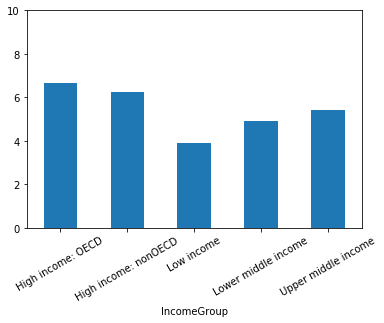

In [114]:
pv_incomes.plot(kind = 'bar', rot = 30, ylim = (0,10), legend = False)
plt.show()

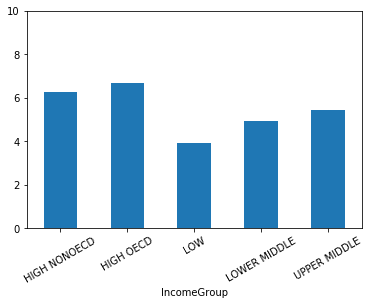

In [115]:
merged['IncomeGroup'] = merged['IncomeGroup'].str.replace(' income', '').str.replace(':', '').str.upper()
pv_incomes = merged.pivot_table(values = 'Happiness Score', index = 'IncomeGroup')
pv_incomes.plot(kind = 'bar', rot = 30, ylim = (0,10), legend = False)
plt.show()

<table class="tg">
<tbody><tr>
<th>Method</th>
<th>Description</th>
</tr>
<tr>
<td>Series.str.split()</td>
<td>Splits each element in the Series.</td>
</tr>
<tr>
<td>Series.str.strip()</td>
<td>Strips whitespace from each string in the Series.</td>
</tr>
<tr>
<td>Series.str.lower()</td>
<td>Converts strings in the Series to lowercase.</td>
</tr>
<tr>
<td>Series.str.upper()</td>
<td>Converts strings in the Series to uppercase.</td>
</tr>
<tr>
<td>Series.str.get()</td>
<td>Retrieves the ith element of each element in the Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.replace()</span></td>
<td><span style="font-weight:300;font-style:normal">Replaces a regex or string in the Series with another string.</span></td>
</tr>
<tr>
<td>Series.str.cat()</td>
<td>Concatenates strings in a Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.extract()</span></td>
<td><span style="font-weight:300;font-style:normal">Extracts substrings from the Series matching a regex pattern.</span></td>
</tr>
</tbody></table>

## Working With Missing Data

### Introduction

In [169]:
happiness2015 = pd.read_csv('data/wh_2015.csv') 
happiness2016 = pd.read_csv('data/wh_2016.csv') 
happiness2017 = pd.read_csv('data/wh_2017.csv')

In [117]:
shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape
shape_2017 = happiness2017.shape

In [118]:
shape_2015

(164, 13)

In [119]:
shape_2016

(164, 14)

In [120]:
shape_2017

(164, 13)

### Identifying Missing Values

In [148]:
missing = happiness2015['Happiness Score'].isnull()
happiness2015[missing]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [123]:
happiness2015.isnull().sum()

Country                          0
Region                           6
Happiness Rank                   6
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64

In [124]:
happiness2016.isnull().sum()

Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64

In [125]:
happiness2017.isnull().sum()

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

### Correcting Data Cleaning Errors that Result in Missing Values

In [149]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index = True, sort = True)

In [150]:
combined.isnull().sum() #stolpci imajo različna imena, zato se stvari ne sestavijo prav

Country                          0  
Dystopia Residual                177
Dystopia.Residual                337
Economy (GDP per Capita)         177
Economy..GDP.per.Capita.         337
Family                           22 
Freedom                          22 
Generosity                       22 
Happiness Rank                   177
Happiness Score                  177
Happiness.Rank                   337
Happiness.Score                  337
Health (Life Expectancy)         177
Health..Life.Expectancy.         337
Lower Confidence Interval        335
Region                           177
Standard Error                   334
Trust (Government Corruption)    177
Trust..Government.Corruption.    337
Upper Confidence Interval        335
Whisker.high                     337
Whisker.low                      337
Year                             0  
dtype: int64

In [151]:
happiness2017.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


In [170]:
happiness2017.columns = happiness2017.columns.str.replace('.',' ') \
                        .str.replace(r'\s+', ' ')\
                        .str.upper()

In [153]:
happiness2017.head(2)

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,WHISKER HIGH,WHISKER LOW,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,GENEROSITY,TRUST GOVERNMENT CORRUPTION,DYSTOPIA RESIDUAL,YEAR
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


In [171]:
happiness2016.columns = happiness2016.columns.str.replace('.', ' ') \
                        .str.replace(r'[\(\)]', '') \
                        .str.strip() \
                        .str.upper()

In [175]:
happiness2016.head()

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR
0,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4.0,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5.0,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [172]:
happiness2015.columns = happiness2015.columns.str.replace('.', ' ') \
                        .str.replace(r'[\(\)]', '') \
                        .str.strip() \
                        .str.upper()

In [176]:
happiness2015.head(2)

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [173]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index = True, sort = True)

In [174]:
combined.isnull().sum()

COUNTRY                         0  
DYSTOPIA RESIDUAL               22 
ECONOMY GDP PER CAPITA          177
ECONOMY GDP PER CAPITA          337
FAMILY                          22 
FREEDOM                         22 
GENEROSITY                      22 
HAPPINESS RANK                  22 
HAPPINESS SCORE                 22 
HEALTH LIFE EXPECTANCY          177
HEALTH LIFE EXPECTANCY          337
LOWER CONFIDENCE INTERVAL       335
REGION                          177
STANDARD ERROR                  334
TRUST GOVERNMENT CORRUPTION     177
TRUST GOVERNMENT CORRUPTION     337
UPPER CONFIDENCE INTERVAL       335
WHISKER HIGH                    337
WHISKER LOW                     337
YEAR                            0  
dtype: int64

In [177]:
happiness2015 = pd.read_csv('data/wh_2015.csv') 
happiness2016 = pd.read_csv('data/wh_2016.csv') 
happiness2017 = pd.read_csv('data/wh_2017.csv')

happiness2017.columns = happiness2017.columns.str.replace('.', ' ') \
                    .str.replace('\s+', ' ') \
                    .str.strip() \
                    .str.upper()

happiness2016.columns = happiness2016.columns.str.replace('.', ' ') \
                    .str.replace(r'[\(\)]', '') \
                    .str.strip() \
                    .str.upper()

happiness2015.columns = happiness2015.columns.str.replace('.', ' ') \
                    .str.replace(r'[\(\)]', '') \
                    .str.strip() \
                    .str.upper()

combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True, sort=True)    
missing = combined.isnull().sum()  

### Visualizing Missing Data

In [178]:
import seaborn as sns

In [179]:
combined_updated = combined.set_index('YEAR')

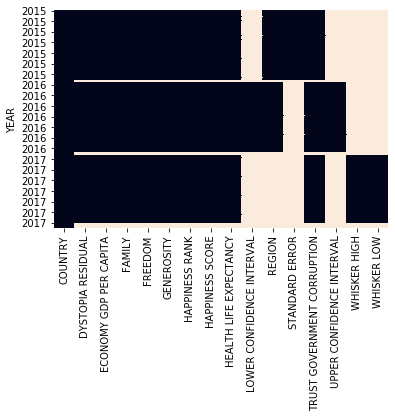

In [180]:
sns.heatmap(combined_updated.isnull(),cbar=False)
plt.show()

In [181]:
combined[combined['YEAR'] == 2017]['REGION'].isnull().sum()

164

### Using Data From Additional Sources to Fill in Missing Values

In [ ]:
regions2015 = happiness2015[['COUNTRY', 'REGION']].copy()
regions2016 = happiness2016[['COUNTRY', 'REGION']].copy()


### Identifying Duplicates Values

### Correcting Duplicates Values

### Handle Missing Values by Dropping Columns

In [ ]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 
                   'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 
                   'WHISKER LOW']

### Analyzing Missing Data

### Handling Missing Values with Imputation

### Dropping Rows

## Identifying Hidden Missing Data

### Primer: Happiness 2015

In [ ]:
happiness2015 = pd.read_csv('data/wh_2015_special.csv')

### Primer: Diabetes

In [ ]:
diabetes = pd.read_csv('data/pima-indians-diabetes_data.csv')

#### Analyzing missingness percentage

## Andvance Visualization of Missing Data

In [ ]:
# Import missingno as msno
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

### Missingness Patterns

## Handle Missing Values

### Dropping Rows

### Imputation Techniques

#### Mean & median imputation


#### Mode and constant imputation

#### Visualize imputations

In [ ]:



imputations = {'Mean Imputation': diabetes_mean, 'Median Imputation': diabetes_median, 
               'Most Frequent Imputation': diabetes_mode, 'Constant Imputation': diabetes_constant}

